In [3]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader
import lightning as L
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Build the network From Scartch

In [30]:
class WordEmbeddingFromScratch(L.LightningModule):


    # Create and initialize Weight tensors, and create the loss function.
    def __init__(self):
      super().__init__()

      min_value = -0.5
      max_value = 0.5

      self.input1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      self.output1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      self.loss = nn.CrossEntropyLoss()

    def forward(self, input):
      input = input[0]

      inputs_to_top_hidden = (
          (input[0] * self.input1_w1) +
          (input[1] * self.input2_w1) +
          (input[2] * self.input3_w1) +
          (input[3] * self.input4_w1)
      )

      inputs_to_bottom_hidden = (
          (input[0] * self.input1_w2) +
          (input[1] * self.input2_w2) +
          (input[2] * self.input3_w2) +
          (input[3] * self.input4_w2)
      )

      output1 = (
      (inputs_to_top_hidden * self.output1_w1) +
      (inputs_to_bottom_hidden * self.output1_w2)
      )

      output2 = (
        (inputs_to_top_hidden * self.output2_w1) +
        (inputs_to_bottom_hidden * self.output2_w2)
      )

      output3 = (
        (inputs_to_top_hidden * self.output3_w1) +
        (inputs_to_bottom_hidden * self.output3_w2)
      )

      output4 = (
        (inputs_to_top_hidden * self.output4_w1) +
        (inputs_to_bottom_hidden * self.output4_w2)
      )

      output_presoftmax = torch.stack([output1, output2, output3, output4])

      return (output_presoftmax)



    def configure_optimizers(self):
      # Configure Adam optimizer.
      return Adam(self.parameters(), lr=0.1)

    def training_step(self, batch, batch_idx):
      input_i, label_i = batch
      output_i = self.forward(input_i)
      loss = self.loss(output_i, label_i[0])
      return loss


## Visualization

In [31]:
modelFromScratch = WordEmbeddingFromScratch()

data = {
    "w1": [
        modelFromScratch.input1_w1.item(),
        modelFromScratch.input2_w1.item(),
        modelFromScratch.input3_w1.item(),
        modelFromScratch.input4_w1.item()
    ],
    "w2": [
        modelFromScratch.input1_w2.item(),
        modelFromScratch.input2_w2.item(),
        modelFromScratch.input3_w2.item(),
        modelFromScratch.input4_w2.item()
    ],
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}

df = pd.DataFrame(data)



In [32]:
df

,w1,w2,token,input
0,0.230364,0.438742,Troll2,input1
1,-0.421429,-0.058084,is,input2
2,-0.257675,0.438879,great,input3
3,0.363740,-0.486142,Gymkata,input4


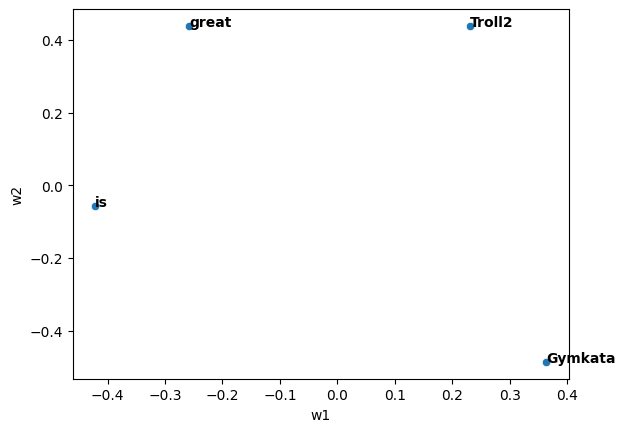

In [33]:
sns.scatterplot(data=df, x="w1", y="w2")

plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()


## Train the model

In [34]:
inputs = torch.tensor([[1., 0., 0., 0.],
                       [0., 1., 0., 0.],
                       [0., 0., 1., 0.],
                       [0., 0., 0., 1.]])
labels = torch.tensor([[0., 1., 0., 0.],
                       [0., 0., 1., 0.],
                       [0., 0., 0., 1.],
                       [1., 0., 0., 0.]])

# Create a TensorDataset
dataset = TensorDataset(inputs, labels)

# Create a DataLoader
dataloader = DataLoader(dataset)

In [42]:
trainer = L.Trainer(max_epochs=500)
trainer.fit(modelFromScratch, train_dataloaders=dataloader)


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss_fn      | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name         | Type             | Params | Mode 
-----------------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=500` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=500` reached.


In [43]:
after_train_data = {
    "w1": [
        modelFromScratch.input1_w1.item(),
        modelFromScratch.input2_w1.item(),
        modelFromScratch.input3_w1.item(),
        modelFromScratch.input4_w1.item()
    ],
    "w2": [
        modelFromScratch.input1_w2.item(),
        modelFromScratch.input2_w2.item(),
        modelFromScratch.input3_w2.item(),
        modelFromScratch.input4_w2.item()
    ],
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}

df_after_train_data = pd.DataFrame(after_train_data)
df_after_train_data

,w1,w2,token,input
0,2.945188,3.917290,Troll2,input1
1,-3.098258,-4.028950,is,input2
2,-4.122671,3.478527,great,input3
3,3.676101,-3.117726,Gymkata,input4


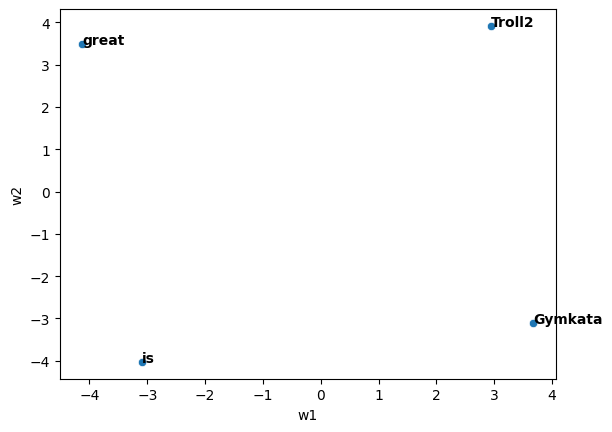

In [44]:
sns.scatterplot(data=df_after_train_data, x="w1", y="w2")

plt.text(df_after_train_data.w1[0], df_after_train_data.w2[0], df_after_train_data.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df_after_train_data.w1[1], df_after_train_data.w2[1], df_after_train_data.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df_after_train_data.w1[2], df_after_train_data.w2[2], df_after_train_data.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df_after_train_data.w1[3], df_after_train_data.w2[3], df_after_train_data.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

# Using Pytorch Linear

In [47]:
class WordEmbeddingWithLinear(L.LightningModule):

    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Linear(in_features=4, out_features=2, bias=False)
        self.hidden_to_output = nn.Linear(in_features=2, out_features=4, bias=False)
        self.loss = nn.CrossEntropyLoss()

    def forward(self, input):
        hidden = self.input_to_hidden(input[0])
        output_values = self.hidden_to_output(hidden)
        return output_values

    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.1)

    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i[0])
        return loss


In [48]:
modelLinear = WordEmbeddingWithLinear()

data = {
    "w1": modelLinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modelLinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}

df = pd.DataFrame(data)
df


,w1,w2,token,input
0,-0.207790,0.036692,Troll2,input1
1,0.265423,-0.343317,is,input2
2,-0.145784,0.271880,great,input3
3,0.285411,0.047226,Gymkata,input4


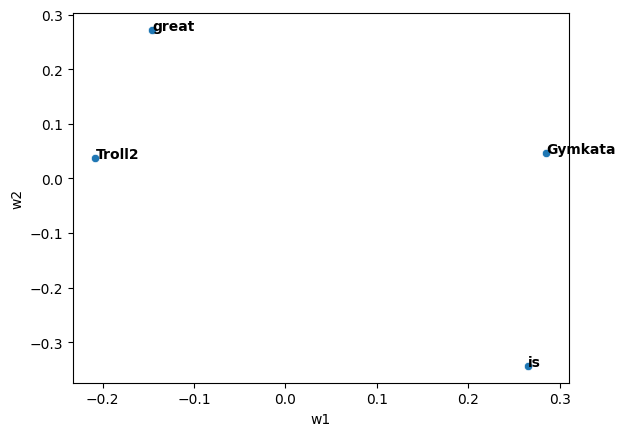

In [49]:
sns.scatterplot(data=df, x="w1", y="w2")

plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()


In [50]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelLinear, train_dataloaders=dataloader)


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | input_to_hidden  | Linear           | 8      | train
1 | hidden_to_output | Linear           | 8      | train
2 | loss             | CrossEntropyLoss | 0      | train
--------------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name             | Type  

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [52]:
linear_train_data = {
    "w1": modelLinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modelLinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}

df = pd.DataFrame(linear_train_data)
df

,w1,w2,token,input
0,-1.978131,1.695916,Troll2,input1
1,-1.597515,-2.248267,is,input2
2,1.737680,2.078819,great,input3
3,2.805448,-2.046581,Gymkata,input4


In [54]:
modelLinear.input_to_hidden.weight

Parameter containing:
tensor([[-1.9781, -1.5975,  1.7377,  2.8054],
        [ 1.6959, -2.2483,  2.0788, -2.0466]], requires_grad=True)

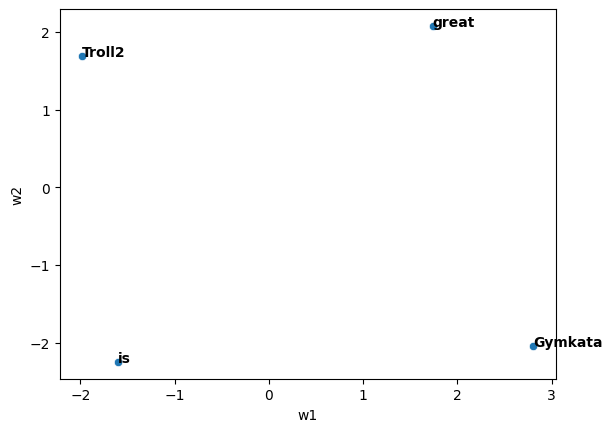

In [53]:
sns.scatterplot(data=df, x="w1", y="w2")

plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

# Test

In [45]:
softmax = nn.Softmax(dim=0)
print(torch.round(softmax(modelFromScratch(torch.tensor([[1., 0., 0., 0.]]))), decimals=2))

tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)


# Load the pre-trained Word Embedding Values

In [55]:
modelLinear.input_to_hidden.weight

Parameter containing:
tensor([[-1.9781, -1.5975,  1.7377,  2.8054],
        [ 1.6959, -2.2483,  2.0788, -2.0466]], requires_grad=True)

In [58]:
word_embeding = nn.Embedding.from_pretrained(modelLinear.input_to_hidden.weight.T)
word_embeding.weight

Parameter containing:
tensor([[-1.9781,  1.6959],
        [-1.5975, -2.2483],
        [ 1.7377,  2.0788],
        [ 2.8054, -2.0466]])

In [59]:
word_embeding(torch.tensor([0]))

tensor([[-1.9781,  1.6959]])

In [60]:
vocab = {'Tro112': 0, 'is': 1, 'great': 2, 'Gymkata': 3}
word_embeding(torch.tensor(vocab['Tro112']))

tensor([-1.9781,  1.6959])